# Men's Basketball

<img src='mens_basketball.jpg'/>

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',80)

# 2. Inspect Data

In [2]:
master = pd.read_csv('data/basketball_master.csv')
teams = pd.read_csv('data/basketball_teams.csv')
coaches = pd.read_csv('data/basketball_coaches.csv')
series_post = pd.read_csv('data/basketball_series_post.csv')
abbrev = pd.read_csv('data/basketball_abbrev.csv')
awards_coaches = pd.read_csv('data/basketball_awards_coaches.csv')
awards_players = pd.read_csv('data/basketball_awards_players.csv')
draft = pd.read_csv('data/basketball_draft.csv')
hof = pd.read_csv('data/basketball_hof.csv')
player_allstar = pd.read_csv('data/basketball_player_allstar.csv')

## Data Description

- **master**: biographical information for all the players and coaches
- **teams**: stats on each team, per year
- **coaches**: stats for each coach, per year
- **series_post**: information on post-season winners, per year
- **abbrev**: a key to the abbreviations used in other tables
- **awards_coaches**: coaching awards, per year
- **awards_players**: player awards, per year
- **draft**: draft information, per year
- **hof**: Hall of Fame information, per year
- **player_allstar**: individual player stats for the All-Star Game, per year

In [3]:
teams.head()

,year,lgID,tmID,franchID,confID,divID,rank,confRank,playoff,name,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_3pm,d_3pa,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_pts,o_tmRebound,d_tmRebound,homeWon,homeLost,awayWon,awayLost,neutWon,neutLoss,confWon,confLoss,divWon,divLoss,pace,won,lost,games,min,arena,attendance,bbtmID
0,1946,NBA,BOS,BOS,NaN,ED,5,0,NaN,Boston Celtics,1397,5133,811,1375,0,0,0,0,0,470,1202,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3898,0,0,14,16,8,22,0,0,0,0,11,19,0,22,38,60,14500.0,Boston Garden,32767,BOS
1,1946,NBA,CHS,CHS,NaN,WD,1,0,F,Chicago Stags,1879,6309,939,1550,0,0,0,0,0,436,1473,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4473,0,0,22,9,17,13,0,0,0,0,17,8,0,39,22,61,14840.0,Chicago Stadium,0,CHS
2,1946,NBA,CLR,CLR,NaN,WD,3,0,R1,Cleveland Rebels,1674,5699,903,1428,0,0,0,0,0,494,1246,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0,0,17,13,13,17,0,0,0,0,10,14,0,30,30,60,14600.0,Cleveland Arena,0,CLR
3,1946,NBA,DTF,DTF,NaN,WD,4,0,NaN,Detroit Falcons,1437,5843,923,1494,0,0,0,0,0,482,1351,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3917,0,0,12,18,8,22,0,0,0,0,8,16,0,20,40,60,14600.0,Detroit Olympia,0,DTF
4,1946,NBA,NYK,NYK,NaN,ED,3,0,SF,New York Knicks,1465,5255,951,1438,0,0,0,0,0,457,1218,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3842,0,0,18,12,15,15,0,0,0,0,13,17,0,33,27,60,14575.0,Madison Square Garden (III),32767,NYK


- **lgID** - the league in which a team participated in a particular year
- **tmID** - a unique identifier for each team in the dataset
- **franchID** - the team's current franchise. **Philadelphia Warriors (PHW)**, for example, relocated to San Francisco in 1962 and became San Francisco Warriors until 1971, when its name was changed to **Golden State Warriors (GSW)**    
- **confID** - the conference in which a team belongs
- **divID** - the division in which a team belongs
- **rank** - a team's rank in its division
- **confRank** - a team's rank in its conference
- **playoff** - indicates how far a team went in the playoffs
- **o_fgm** - overall field goals made
- **o_fga** - overall field goals attempted
- **o_ftm** - overall free throws made
- **o_fta** - overall field throws attempted
- **o_3pm** - overall 3-pointers made
- **o_3pa** - overall 3-pointers attempted
- **o_oreb** - overall offensive rebounds
- **o_dreb** - overall defensive rebounds
- **o_reb** - overall rebounds
- **o_asts** - overall assists
- **o_pf** - overall personal fouls
- **o_stl** - overall steals
- **o_to** - overall turnovers
- **o_blk** - overall blocks
- **o_pts** - overall points
- **d_fgm** - field goals made by opponents 
- **d_fga** - field goals attempted by opponents
- **d_ftm** - free throws made by opponents
- **d_fta** - field throws attempted by opponents
- **d_3pm** - 3-pointers made by opponents
- **d_3pa** - 3-pointers attempted by opponents
- **d_oreb** - opponents' offensive rebounds 
- **d_dreb** - opponents' defensive rebounds
- **d_reb** - opponents' overall rebounds
- **d_asts** - opponents' assists
- **d_pf** - opponents' personal fouls
- **d_stl** - opponents' steals
- **d_to** - opponents' turnovers
- **d_blk** - opponents' blocks
- **d_pts** - opponents' points
- **o_tmRebound** - overall team rebounds
- **d_tmRebound** - opponents' team rebounds
- **homeWon** - number of home games won
- **homeLost** - number of home games lost
- **awayWon** - number of away games won
- **awayLost** - number of away games lost
- **neutWon** - number of wins on neutral grounds
- **neutLoss** - number of losses on neutral grounds,
- **confWon** - number of conference games won
- **confLoss** - number of conference games lost
- **divWon** - number of division games won
- **divLoss** - number of division games lost
- **pace** - number of possessions per 48 minutes 
- **won** - total games won
- **lost** - total games lost
- **games** - total games played
- **min** - total minutes played
- **arena** - team's home ground 

Let's give the columns consistent and descriptive names

In [4]:
teams.columns = ['year', 'lg_id', 'tm_id', 'franch_id', 'conf_id', 'div_id', 'div_rank',
       'conf_rank', 'playoff', 'name', 'fg_made', 'fg_attempts', 'ft_made', 'ft_attempts',
       'treys_made', 'treys_attempts', 'off_reb', 'def_reb', 'reb', 'assists', 'fouls',
       'steals', 'turnovers', 'blocks', 'points', 'opp_fg_made', 'opp_fg_attempts', 
       'opp_ft_made', 'opp_ft_attempts','opp_treys_made', 'opp_treys_attempts', 'opp_off_reb',
       'opp_def_reb', 'opp_reb', 'opp_assists', 'opp_fouls', 'opp_steals', 'opp_turnovers',
       'opp_blocks', 'opp_points', 'tm_reb', 'opp_tm_reb', 'home_wins', 'home_losses', 
       'away_wins', 'away_losses', 'net_wins', 'net_losses', 'conf_wins', 'conf_losses', 
       'div_wins', 'div_losses', 'pace', 'tot_wins', 'tot_losses','games_played', 'mins_played',
       'home_ground', 'attendance', 'bbtm_id']

In [5]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                1536 non-null   int64  
 1   lg_id               1536 non-null   object 
 2   tm_id               1536 non-null   object 
 3   franch_id           1536 non-null   object 
 4   conf_id             1064 non-null   object 
 5   div_id              1498 non-null   object 
 6   div_rank            1536 non-null   int64  
 7   conf_rank           1536 non-null   int64  
 8   playoff             901 non-null    object 
 9   name                1536 non-null   object 
 10  fg_made             1536 non-null   int64  
 11  fg_attempts         1536 non-null   int64  
 12  ft_made             1536 non-null   int64  
 13  ft_attempts         1536 non-null   int64  
 14  treys_made          1536 non-null   int64  
 15  treys_attempts      1536 non-null   int64  
 16  off_re

- There are **1536 rows** and **60 columns** in the dataset
- Most of the columns are numeric
- There are not too many missing values. **playoff** has almost **50 percent** missing values. This is reasonable because only **16 teams** participate in the tournament.

In [6]:
teams.describe()

,year,div_rank,conf_rank,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,opp_fouls,opp_steals,opp_turnovers,opp_blocks,opp_points,tm_reb,opp_tm_reb,home_wins,home_losses,away_wins,away_losses,net_wins,net_losses,conf_wins,conf_losses,div_wins,div_losses,pace,tot_wins,tot_losses,games_played,mins_played,attendance
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1322.000000,1536.000000
mean,1981.472656,3.346354,4.397135,2920.631510,6363.819010,1572.903646,2093.155599,194.324870,563.151042,741.756510,1677.847005,3299.985677,1659.423177,1725.720052,452.635417,960.897786,278.067708,7623.557292,2428.643229,5239.662109,1246.173828,243.814453,525.278646,1639.120443,741.756510,1677.847005,2686.380208,1413.337240,1418.064453,452.635417,960.897786,278.067708,7623.422526,59.255208,6.106771,21.361328,12.610677,12.609375,21.363281,1.081380,1.083333,16.682292,16.682292,11.761068,11.763672,5.529297,37.552734,37.557943,70.618490,19148.793495,25710.521484
std,20.123185,1.773812,4.555967,901.436961,2111.758438,476.075297,670.675615,212.856804,585.410835,520.660237,1139.579799,1336.302511,600.846118,567.692912,325.460652,628.799610,205.152812,2213.809270,1435.128608,3075.981633,748.413908,363.634204,540.061639,995.783888,517.685239,1140.484083,1583.100044,843.209954,834.439558,323.010733,629.799579,200.203325,2213.479498,181.357020,62.627291,9.846326,7.661367,7.446033,9.429432,2.680953,2.826277,14.477500,14.473945,7.765761,7.742737,22.181582,14.166431,14.074785,23.965236,2020.620665,13469.406103
min,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2640.000000,0.000000
25%,1968.000000,2.000000,0.000000,2839.750000,6410.500000,1455.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,3317.750000,1579.000000,1703.750000,0.000000,0.000000,0.000000,7620.500000,1596.500000,3785.500000,802.000000,0.000000,0.000000,1074.500000,0.000000,0.000000,1987.250000,936.500000,1029.250000,0.000000,0.000000,0.000000,7572.000000,0.000000,0.000000,15.000000,7.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,0.000000,28.000000,28.000000,75.000000,19730.000000,32767.000000
50%,1984.000000,3.000000,3.000000,3169.500000,6894.500000,1639.000000,2191.500000,106.000000,352.500000,962.000000,2356.000000,3526.000000,1818.500000,1875.500000,597.000000,1215.000000,352.500000,8321.500000,3071.500000,6710.500000,1554.500000,118.000000,376.000000,2056.500000,970.000000,2336.000000,3423.000000,1793.000000,1818.000000,611.500000,1217.000000,368.000000,8357.000000,0.000000,0.000000,23.000000,12.000000,12.000000,23.000000,0.000000,0.000000,19.000000,19.000000,12.000000,12.000000,0.000000,39.000000,38.000000,82.000000,19780.000000,32767.000000
75%,1999.000000,5.000000,8.000000,3504.000000,7471.000000,1861.500000,2472.000000,363.000000,1060.000000,1138.250000,2499.000000,3817.250000,2021.250000,2038.000000,699.250000,1

- The data contains teams statistics between **1937** and **2011**
- The highest number of points accumulated by a team over these years is **10,371** while the highest number of points conceded is **10,723**
- The highest number of wins by a team over these years is **72** while the highest number of losses is **73**
- The highest number of minutes played by a team over these years is **20,460** while the lowest number of minutes is **2,640**

# 3. Data Exploration

## Leagues

What are the unique basketball leagues in the dataset?

In [7]:
teams.lg_id.unique()

array(['NBA', 'ABA', 'ABL1', 'NPBL', 'NBL', 'PBLA'], dtype=object)

How many unique teams have participated in each league over the years?

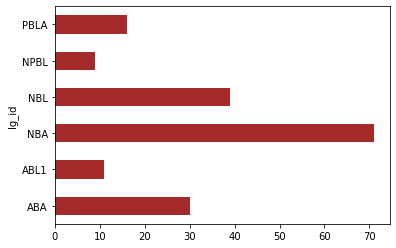

In [8]:
(teams.groupby('lg_id').tm_id.nunique()).plot.barh(color='brown');

Most teams in the dataset participated in **NBA**. The rest of this notebook will focus on the NBA

In [9]:
nba = teams[teams.lg_id=='NBA']

In [10]:
nba.describe()

,year,div_rank,conf_rank,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,opp_fouls,opp_steals,opp_turnovers,opp_blocks,opp_points,tm_reb,opp_tm_reb,home_wins,home_losses,away_wins,away_losses,net_wins,net_losses,conf_wins,conf_losses,div_wins,div_losses,pace,tot_wins,tot_losses,games_played,mins_played,attendance
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.00000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1214.000000,1304.000000
mean,1986.043712,3.359663,5.179448,3113.470092,6883.472393,1665.045245,2227.427147,218.985429,629.649540,821.064417,1874.687883,3554.744632,1821.088957,1865.732362,517.186350,1023.067485,318.474693,8110.970859,2605.380368,5612.307515,1328.318252,277.13727,589.673313,1745.142638,821.064417,1874.687883,2861.329755,1540.506902,1520.813650,517.186350,1023.067485,318.474693,8110.812117,68.705521,7.193252,22.443252,13.394172,13.391871,22.444785,1.110429,1.112730,19.650307,19.650307,12.322853,12.325920,6.513037,39.591258,39.597393,73.897239,19184.155684,29048.046012
std,17.491243,1.776092,4.516365,546.108032,909.674738,292.366356,384.449769,219.709497,602.499287,466.917059,1025.986839,947.739366,342.857765,254.527159,293.525248,581.478160,187.471140,1256.025830,1293.849664,2749.915283,670.482027,384.29584,555.191476,890.508605,463.145025,1027.026438,1402.191574,770.366825,751.577862,290.630389,582.929518,181.244235,1257.741099,195.012326,67.916879,9.261023,7.515315,7.263422,8.852766,2.805556,2.990703,13.731348,13.726932,6.511993,6.477216,23.941919,12.523903,12.481564,21.324346,1747.536874,10397.656176
min,1946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000,0.000000,3360.000000,0.000000
25%,1974.750000,2.000000,0.000000,2918.750000,6509.750000,1499.000000,2001.500000,0.000000,0.000000,714.250000,1947.000000,3364.000000,1675.000000,1745.000000,459.500000,920.250000,262.750000,7819.000000,2718.250000,6229.750000,1302.000000,0.00000,0.000000,1606.250000,715.750000,1941.500000,3149.750000,1547.750000,1617.250000,477.750000,903.500000,284.500000,7796.500000,0.000000,0.000000,17.750000,8.000000,8.000000,18.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000,0.000000,30.000000,30.000000,82.000000,19730.000000,32767.000000
50%,1989.000000,3.000000,5.000000,3203.000000,6920.000000,1653.000000,2210.500000,154.500000,480.000000,997.000000,2381.000000,3533.000000,1860.500000,1884.000000,625.000000,1227.000000,375.500000,8356.000000,3096.000000,6740.500000,1570.500000,172.50000,462.000000,2084.000000,1007.000000,2366.000000,3434.500000,1835.000000,1828.500000,633.000000,1230.000000,386.000000,8417.000000,0.000000,0.000000,24.000000,13.000000,13.000000,23.000000,0.000000,0.000000,22.000000,21.000000,12.000000,12.000000,0.000000,40.000000,39.000000,82.000000,19780.000000,32767.000000
75%,2001.000000,5.000000,9.000000,3504.000000,7423.250000,1846.000000,2460.500000,407.250000,1160.000000,1143.000000,2505.250000,3769.000000,2049.000000,2033

The nba data consists of records between 1946 and 2011

## NBA Teams

How many unique teams are in the nba dataset?

In [11]:
nba.tm_id.nunique()

71

## NBA Franchises

How many unique franchises are in the nba dataset?

In [12]:
nba.franch_id.nunique()

45

There are more teams than franchises. This is because many teams have changed their names over the years.
  
Which nba teams changed their names?

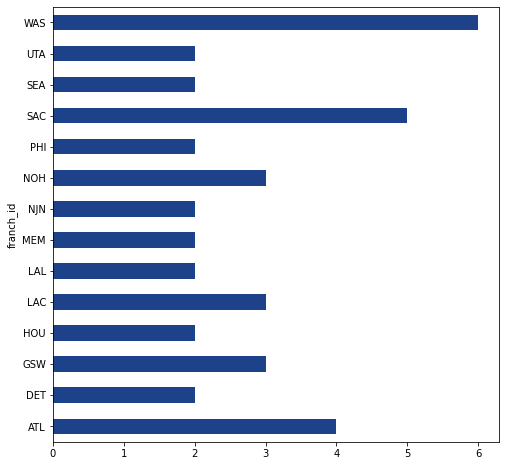

In [13]:
plt.figure(figsize=(8,8))
franch = nba.groupby('franch_id').tm_id.nunique()
(franch[franch>1]).plot.barh(color='#1d428a');

In [14]:
nba[nba.franch_id=='WAS'].tm_id.unique()

array(['CHP', 'CHZ', 'BAL', 'CAP', 'WSB', 'WAS'], dtype=object)

**Washington Wizards (WAS)** changed their team name 6 times. From **Chicago Packers (CHP)** to **Chicago Zephyrs (CHZ)** to **Baltimore Bullets (BAL)** to **Capital Bullets (CAP)** to **Washington Bullets (WSB)** to what they currently are

## NBA Conferences and Divisions

How many conferences are in the NBA?

In [15]:
nba.conf_id.value_counts()

WC    533
EC    531
Name: conf_id, dtype: int64

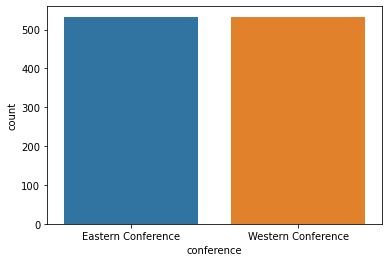

In [16]:
conf_abbrev = abbrev[abbrev.abbrev_type=='Conference']
conf = nba.merge(conf_abbrev,how='left',left_on='conf_id',right_on='code')
conf.drop(columns=['conf_id','abbrev_type','code'],inplace=True)
conf.rename(columns={'full_name':'conference'},inplace=True)

sns.countplot(x='conference',data=conf);

The NBA is divided into Eastern and Western Conference. There about the same number of records for both conferences.
  
How many divisions are in the NBA?

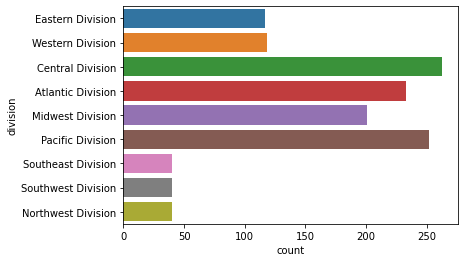

In [17]:
div_abbrev = abbrev[abbrev.abbrev_type=='Division']
div = nba.merge(div_abbrev,how='left',left_on='div_id',right_on='code')
div.drop(columns=['div_id','abbrev_type','code'],inplace=True)
div.rename(columns={'full_name':'division'},inplace=True)

sns.countplot(y='division',data=div);

The NBA is currently has 6 divisions (central, atlantic, pacific, southeast, southwest, and northwest) but we have 9 in our dataset.

- The Eastern and Western division existed until the 1970–71 NBA season when the NBA expanded from 14 to 17 teams and realigned into the Eastern and Western conferences with two divisions each


- The Midwest division was disbanded at the start of the 2004–05 season. It was replaced with two new divisions, the Southwest Division and the Northwest Division.

## Field Goals

This includes both 2 pointers and 3 pointers made by a team

### 1. Which teams attempted the most and least field goals in NBA up until 2011? 

We'll combine the **franch_id** with **year** to have the team names and the years they made these attempts 

In [18]:
nba['franch_year'] = nba['franch_id'] + '(' + nba['year'].astype(str) + ')'

Not all teams played the same number of games. Let's create another column, **fg_attempts_pg**

In [19]:
# let's exclude teams with 0 games and 0 fg attempts
non_zeros = nba[(nba.fg_attempts!=0)&(nba.games_played!=0)]
non_zeros['fg_attempts_pg'] = non_zeros['fg_attempts']/non_zeros['games_played']

In [20]:
most_attempts = non_zeros.sort_values(by='fg_attempts_pg',ascending=False).iloc[:10]
least_attempts = non_zeros.sort_values(by='fg_attempts_pg',ascending=True).iloc[:10]

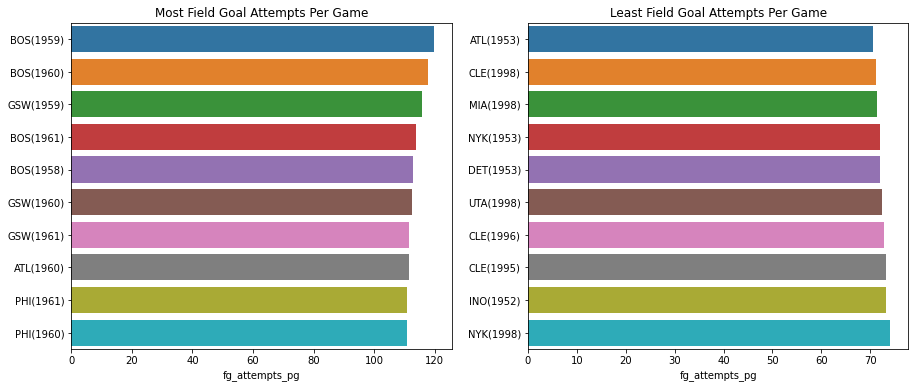

In [21]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='fg_attempts_pg',data=most_attempts,ax=ax[0])
sns.barplot(y='franch_year',x='fg_attempts_pg',data=least_attempts,ax=ax[1])
ax[0].set_title('Most Field Goal Attempts Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Field Goal Attempts Per Game')
ax[1].set_ylabel('');

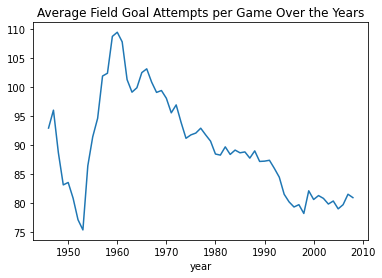

In [22]:
non_zeros.groupby('year').fg_attempts_pg.mean().plot.line()
plt.title('Average Field Goal Attempts per Game Over the Years');

- NBA teams between the late 50s and early 60s attempted alot of shots at goal


- The subplots reflects teams' form. Boston Celtics consistently attempted many shots per game for 4 consecutive years, 1958-61. Same thing applies to Golden State Warriors (1959-61) and Syracruse Nationals(1960-61) 


- The 1995, '96, and '98 Cleveland Cavaliers team consistently attempted very few shots per game in these years

### 2. Which teams had the highest and lowest shots conversion in NBA up until 2011? 

We'll create another column, **fg%**.

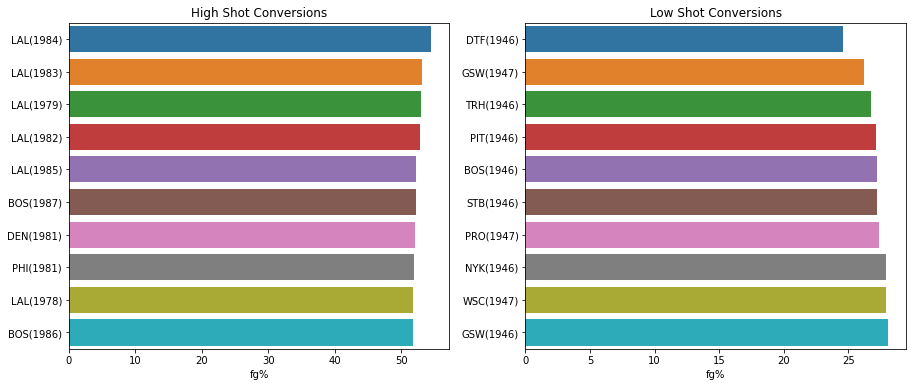

In [23]:
non_zeros['fg%'] = non_zeros['fg_made']*100/non_zeros['fg_attempts']

high_convs = non_zeros.sort_values(by='fg%',ascending=False).iloc[:10]
low_convs = non_zeros.sort_values(by='fg%',ascending=True).iloc[:10]
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='fg%',data=high_convs,ax=ax[0])
sns.barplot(y='franch_year',x='fg%',data=low_convs,ax=ax[1])
ax[0].set_title('High Shot Conversions')
ax[0].set_ylabel('')
ax[1].set_title('Low Shot Conversions')
ax[1].set_ylabel('');

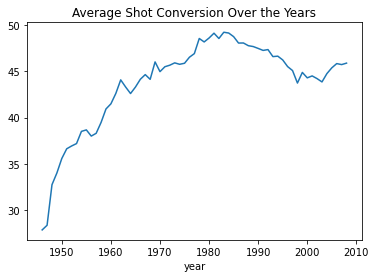

In [24]:
non_zeros.groupby('year')['fg%'].mean().plot.line()
plt.title('Average Shot Conversion Over the Years');

- While the attempts at goal reduced, the shot accuracy have generally improved over the years


- NBA teams between the mid 70s and mid 80s converted a lot of shots


- NBA teams at the start of the league converted very few shots. In 1946, 7 teams failed to convert over 70 percent of their shots


- Los Angeles Lakers had the highest conversion rate in '78, '79, '82, '83, '84, and '85


- The high conversion teams were only able to convert just a bit above half of their attempts at goal


- Detroit Falcons in 1946 were only able to convert less than quarter of their attempts. This is the worst field goal conversion rate in NBA up until 2011

## Free Throws

A free throw, also known as foul shot, is an unguarded scoring attempt that refree awards a basketball player after an opposing team member commits a foul. It is worth one point

### 1. What teams were awarded the most and least free throws in NBA until 2011? 

Not all teams played the same number of games. Let's create another column, **ft_attempts_pg**

In [25]:
# let's exclude teams with 0 games and 0 ft attempts
non_zeros = nba[(nba.ft_attempts!=0)&(nba.games_played!=0)]
non_zeros['ft_attempts_pg'] = non_zeros['ft_attempts']/non_zeros['games_played']

In [26]:
most_attempts = non_zeros.sort_values(by='ft_attempts_pg',ascending=False).iloc[:10]
least_attempts = non_zeros.sort_values(by='ft_attempts_pg',ascending=True).iloc[:10]

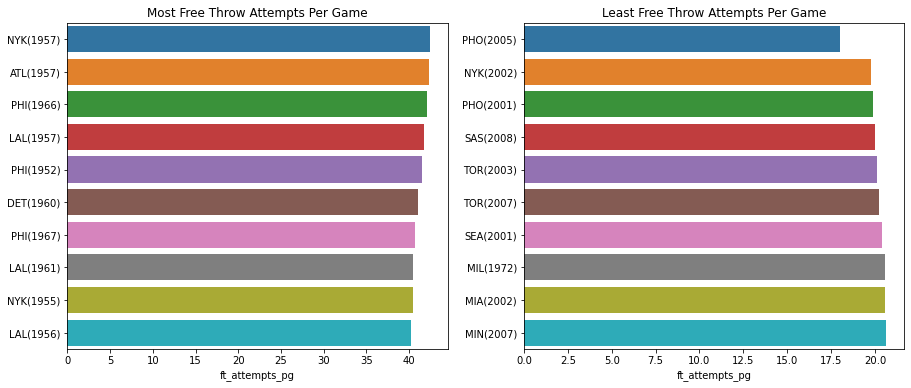

In [27]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='ft_attempts_pg',data=most_attempts,ax=ax[0])
sns.barplot(y='franch_year',x='ft_attempts_pg',data=least_attempts,ax=ax[1])
ax[0].set_title('Most Free Throw Attempts Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Free Throw Attempts Per Game')
ax[1].set_ylabel('');

- More free throws were awarded in the 1900s than in the 2000s

- In 1957 alone, 3 different teams were awarded over 40 free throws per game

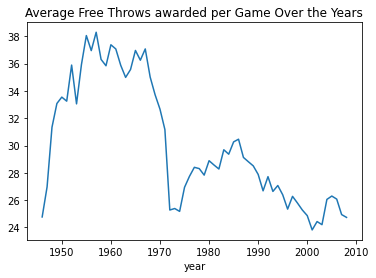

In [28]:
non_zeros.groupby('year').ft_attempts_pg.mean().plot.line()
plt.title('Average Free Throws awarded per Game Over the Years');

### 2. Which teams had the highest and lowest free throws conversion in NBA up until 2011? 

We'll create another column, **fg%**.

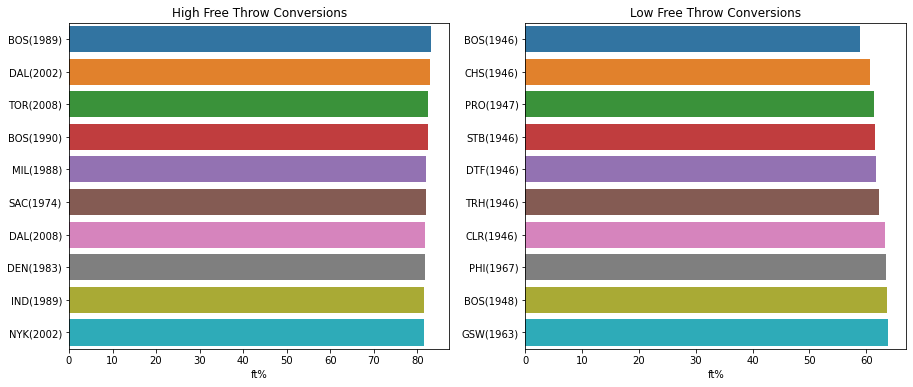

In [29]:
non_zeros['ft%'] = non_zeros['ft_made']*100/non_zeros['ft_attempts']

high_convs = non_zeros.sort_values(by='ft%',ascending=False).iloc[:10]
low_convs = non_zeros.sort_values(by='ft%',ascending=True).iloc[:10]
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='ft%',data=high_convs,ax=ax[0])
sns.barplot(y='franch_year',x='ft%',data=low_convs,ax=ax[1])
ax[0].set_title('High Free Throw Conversions')
ax[0].set_ylabel('')
ax[1].set_title('Low Free Throw Conversions')
ax[1].set_ylabel('');

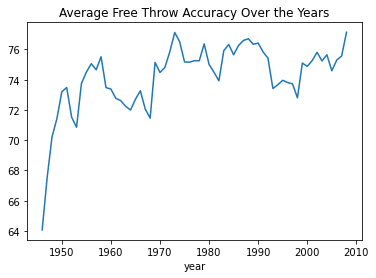

In [30]:
non_zeros.groupby('year')['ft%'].mean().plot.line()
plt.title('Average Free Throw Accuracy Over the Years');

- Free Throw Conversion has improved as the league progressed

## Treys

### 1. Which teams attempted the most and least treys in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **treys_attempts_pg**

In [31]:
# let's exclude teams with 0 games and 0 treys attempts
non_zeros = nba[(nba.treys_attempts!=0)&(nba.games_played!=0)]
non_zeros['treys_attempts_pg'] = non_zeros['treys_attempts']/non_zeros['games_played']

In [32]:
most_attempts = non_zeros.sort_values(by='treys_attempts_pg',ascending=False).iloc[:10]
least_attempts = non_zeros.sort_values(by='treys_attempts_pg',ascending=True).iloc[:10]

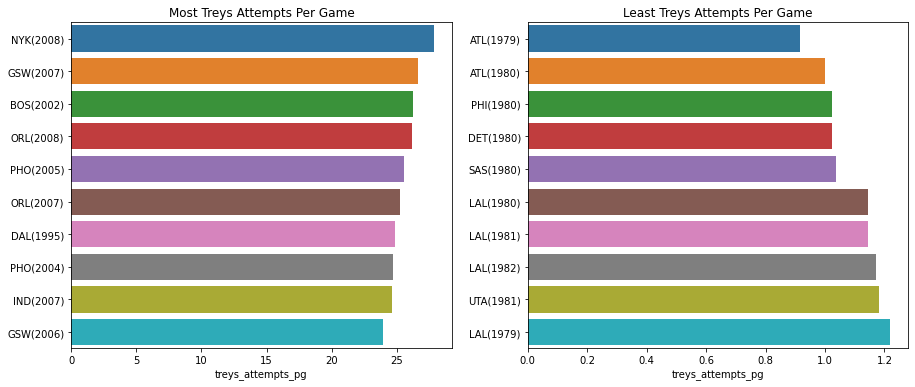

In [33]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='treys_attempts_pg',data=most_attempts,ax=ax[0])
sns.barplot(y='franch_year',x='treys_attempts_pg',data=least_attempts,ax=ax[1])
ax[0].set_title('Most Treys Attempts Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Treys Attempts Per Game')
ax[1].set_ylabel('');

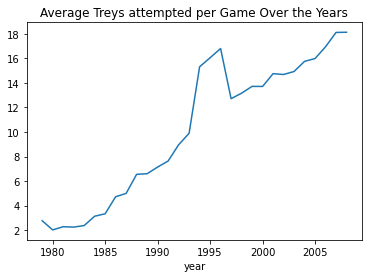

In [34]:
non_zeros.groupby('year').treys_attempts_pg.mean().plot.line()
plt.title('Average Treys attempted per Game Over the Years');

- Teams have attempted more treys in the 2000s than they did in the 1900s. In 2008, two teams averaged over 25 treys per game


- Between 1979 and 1982, Los Angeles Lakers attempted the least treys per game

### 2. Which teams had the highest and lowest treys conversion in NBA up until 2011? 

We'll create another column, **treys%**.

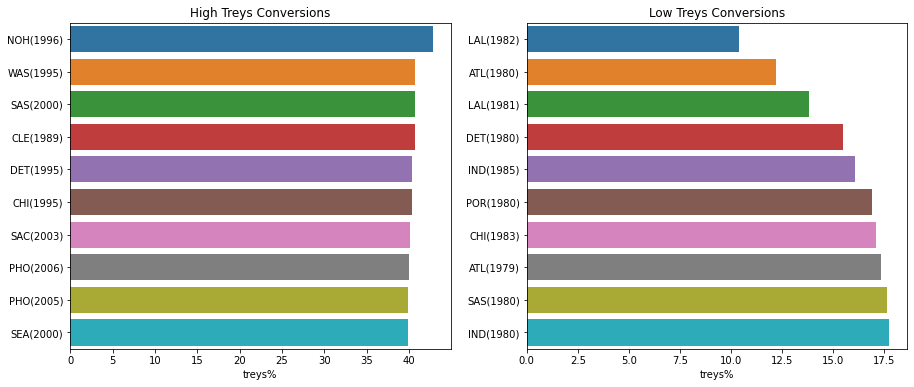

In [35]:
non_zeros['treys%'] = non_zeros['treys_made']*100/non_zeros['treys_attempts']

high_convs = non_zeros.sort_values(by='treys%',ascending=False).iloc[:10]
low_convs = non_zeros.sort_values(by='treys%',ascending=True).iloc[:10]
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='treys%',data=high_convs,ax=ax[0])
sns.barplot(y='franch_year',x='treys%',data=low_convs,ax=ax[1])
ax[0].set_title('High Treys Conversions')
ax[0].set_ylabel('')
ax[1].set_title('Low Treys Conversions')
ax[1].set_ylabel('');

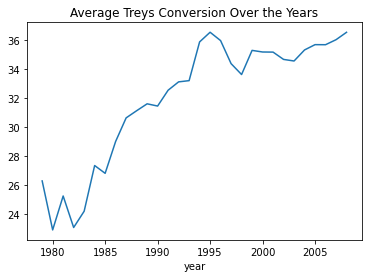

In [36]:
non_zeros.groupby('year')['treys%'].mean().plot.line()
plt.title('Average Treys Conversion Over the Years');

Generally, Treys conversion have improved over the years

## Personal Fouls

Which teams committed the most and least fouls in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **fouls_pg**

In [37]:
# let's exclude teams with 0 games and 0 fouls
non_zeros = nba[(nba.fouls!=0)&(nba.games_played!=0)]
non_zeros['fouls_pg'] = non_zeros['fouls']/non_zeros['games_played']

In [38]:
most_fouls = non_zeros.sort_values(by='fouls_pg',ascending=False).iloc[:10]
least_fouls = non_zeros.sort_values(by='fouls_pg',ascending=True).iloc[:10]

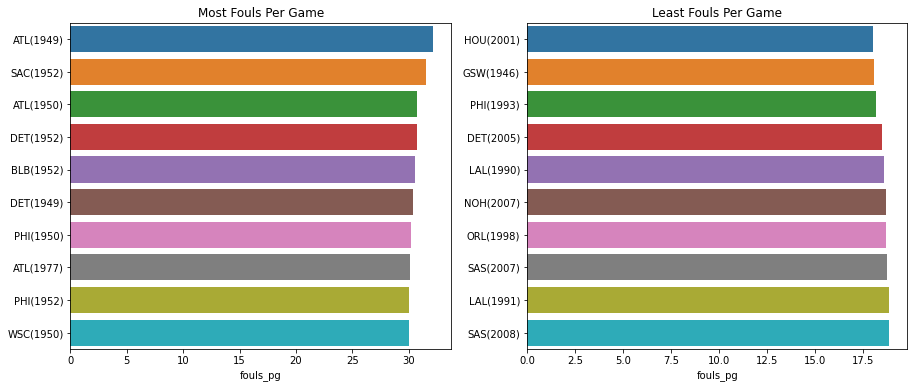

In [39]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='fouls_pg',data=most_fouls,ax=ax[0])
sns.barplot(y='franch_year',x='fouls_pg',data=least_fouls,ax=ax[1])
ax[0].set_title('Most Fouls Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Fouls Per Game')
ax[1].set_ylabel('');

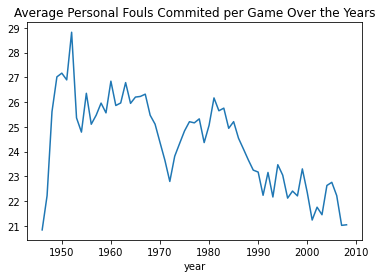

In [40]:
non_zeros.groupby('year').fouls_pg.mean().plot.line()
plt.title('Average Personal Fouls Commited per Game Over the Years');

## Steals

This is the number of times a defensive player or team takes the ball from a player on offense, causing a turnover

Which teams made the most and least steals in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **steals_pg**

In [41]:
# let's exclude teams with 0 games and 0 fouls
non_zeros = nba[(nba.steals!=0)&(nba.games_played!=0)]
non_zeros['steals_pg'] = non_zeros['steals']/non_zeros['games_played']

In [42]:
most_steals = non_zeros.sort_values(by='steals_pg',ascending=False).iloc[:10]
least_steals = non_zeros.sort_values(by='steals_pg',ascending=True).iloc[:10]

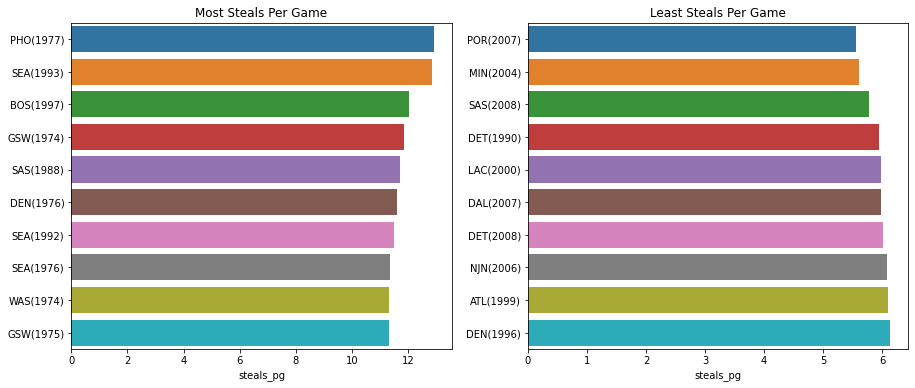

In [43]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='steals_pg',data=most_steals,ax=ax[0])
sns.barplot(y='franch_year',x='steals_pg',data=least_steals,ax=ax[1])
ax[0].set_title('Most Steals Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Steals Per Game')
ax[1].set_ylabel('');

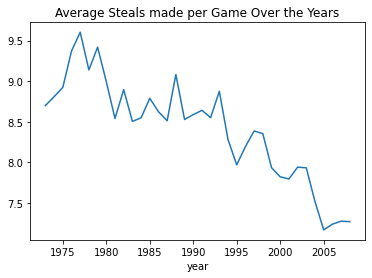

In [44]:
non_zeros.groupby('year').steals_pg.mean().plot.line()
plt.title('Average Steals made per Game Over the Years');

Teams in the 1900s made more steals than teams in the 2000s

## Turnovers

In basketball, a turnover occurs when a team loses possession of the ball to the opposing team before a player takes a shot at their team's basket

Which teams made the most and least turnovers in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **turnovers_pg**

In [45]:
# let's exclude teams with 0 games and 0 fouls
non_zeros = nba[(nba.turnovers!=0)&(nba.games_played!=0)]
non_zeros['turnovers_pg'] = non_zeros['turnovers']/non_zeros['games_played']

In [46]:
most_turnovers = non_zeros.sort_values(by='turnovers_pg',ascending=False).iloc[:10]
least_turnovers = non_zeros.sort_values(by='turnovers_pg',ascending=True).iloc[:10]

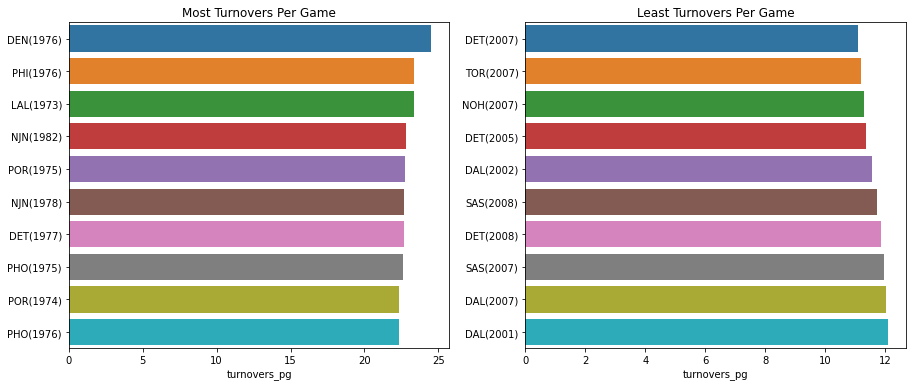

In [47]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='turnovers_pg',data=most_turnovers,ax=ax[0])
sns.barplot(y='franch_year',x='turnovers_pg',data=least_turnovers,ax=ax[1])
ax[0].set_title('Most Turnovers Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Turnovers Per Game')
ax[1].set_ylabel('');

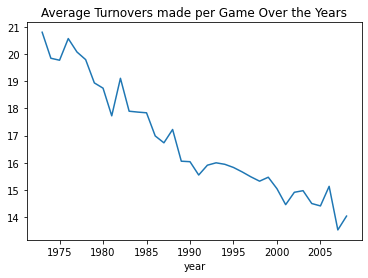

In [48]:
non_zeros.groupby('year').turnovers_pg.mean().plot.line()
plt.title('Average Turnovers made per Game Over the Years');

Turnovers were more frequent in the 1900s than in the 2000s

## Blocks

In basketball, a block occurs when an offensive player attempts a shot, and the defense player tips the ball, blocking their chance to score

Which teams made the most and least blocks in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **blocks_pg**

In [49]:
# let's exclude teams with 0 games and 0 fouls
non_zeros = nba[(nba.blocks!=0)&(nba.games_played!=0)]
non_zeros['blocks_pg'] = non_zeros['blocks']/non_zeros['games_played']

In [50]:
most_blocks = non_zeros.sort_values(by='blocks_pg',ascending=False).iloc[:10]
least_blocks = non_zeros.sort_values(by='blocks_pg',ascending=True).iloc[:10]

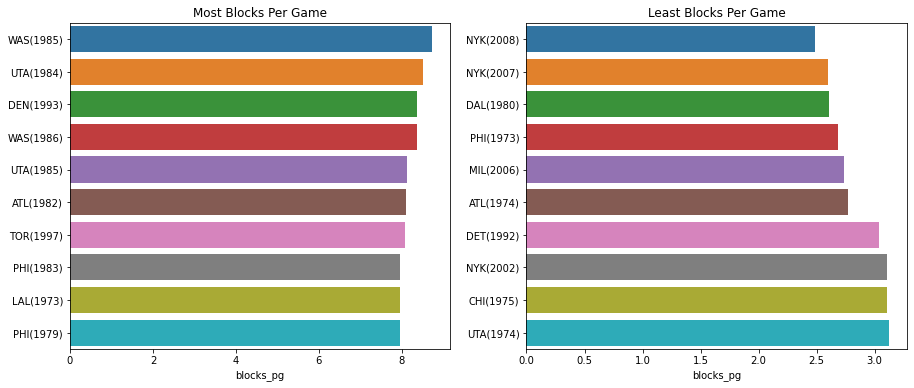

In [51]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='blocks_pg',data=most_blocks,ax=ax[0])
sns.barplot(y='franch_year',x='blocks_pg',data=least_blocks,ax=ax[1])
ax[0].set_title('Most Blocks Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Blocks Per Game')
ax[1].set_ylabel('');

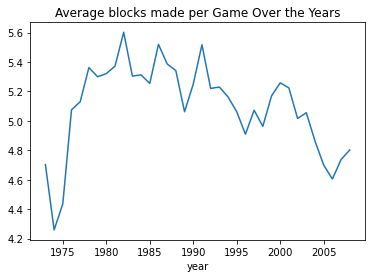

In [52]:
non_zeros.groupby('year').blocks_pg.mean().plot.line()
plt.title('Average blocks made per Game Over the Years');

## Points

Which teams made the most and least points in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **points_pg**

In [53]:
# let's exclude teams with 0 games and 0 fouls
non_zeros = nba[(nba.points!=0)&(nba.games_played!=0)]
non_zeros['points_pg'] = non_zeros['points']/non_zeros['games_played']

In [54]:
most_points = non_zeros.sort_values(by='points_pg',ascending=False).iloc[:10]
least_points = non_zeros.sort_values(by='points_pg',ascending=True).iloc[:10]

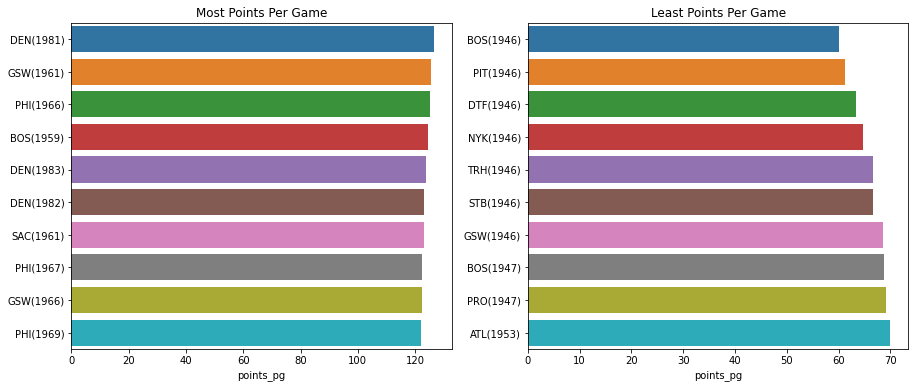

In [55]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='points_pg',data=most_points,ax=ax[0])
sns.barplot(y='franch_year',x='points_pg',data=least_points,ax=ax[1])
ax[0].set_title('Most Points Per Game')
ax[0].set_ylabel('')
ax[1].set_title('Least Points Per Game')
ax[1].set_ylabel('');

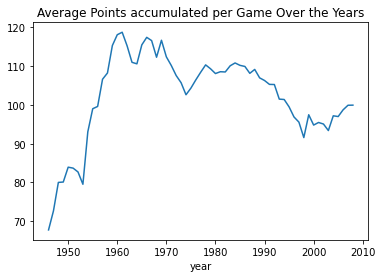

In [56]:
non_zeros.groupby('year').points_pg.mean().plot.line()
plt.title('Average Points accumulated per Game Over the Years');

## Wins

Which teams made the most and least wins in NBA up until 2011? 

Not all teams played the same number of games. Let's create another column, **win%**

In [57]:
# let's exclude teams with 0 games and 0 fouls
non_zeros = nba[(nba.tot_wins!=0)&(nba.games_played!=0)]
non_zeros['win%'] = non_zeros['tot_wins']*100/non_zeros['games_played']

In [58]:
high_wins = non_zeros.sort_values(by='win%',ascending=False).iloc[:10]
low_wins = non_zeros.sort_values(by='win%',ascending=True).iloc[:10]

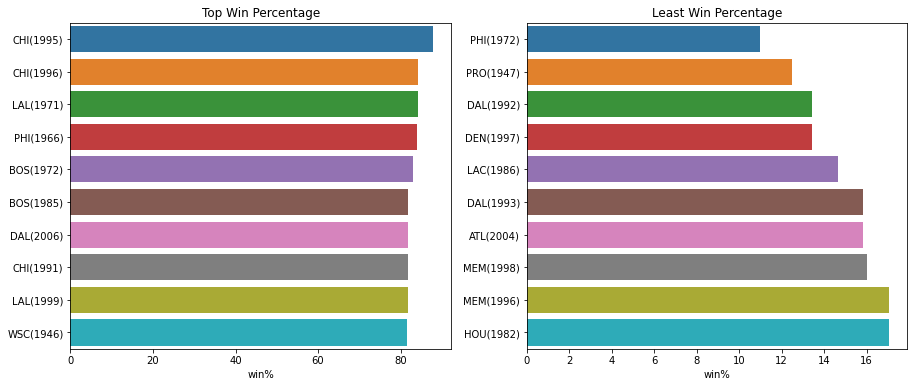

In [59]:
f,ax = plt.subplots(1,2,figsize=(15,6))

sns.barplot(y='franch_year',x='win%',data=high_wins,ax=ax[0])
sns.barplot(y='franch_year',x='win%',data=low_wins,ax=ax[1])
ax[0].set_title('Top Win Percentage')
ax[0].set_ylabel('')
ax[1].set_title('Least Win Percentage')
ax[1].set_ylabel('');

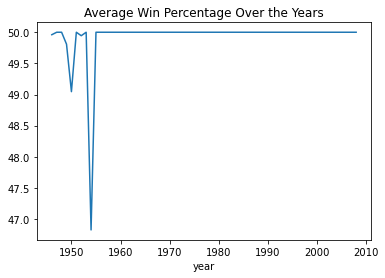

In [60]:
non_zeros.groupby('year')['win%'].mean().plot.line()
plt.title('Average Win Percentage Over the Years');

# 4. Baseline Model

In [61]:
# select playoffs teams
playoffs = nba[nba.playoff.notna()].reset_index(drop=True)
playoffs['made_finals'] = ((playoffs.playoff=='F') | (playoffs.playoff=='NC')).astype(int)
playoff_abbrev = abbrev[abbrev.abbrev_type=='Playoffs']
playoffs['playoff'] = playoffs.merge(playoff_abbrev,how='left',left_on='playoff',right_on='code')['full_name']

In [62]:
playoffs.head()

,year,lg_id,tm_id,franch_id,conf_id,div_id,div_rank,conf_rank,playoff,name,fg_made,fg_attempts,ft_made,ft_attempts,treys_made,treys_attempts,off_reb,def_reb,reb,assists,fouls,steals,turnovers,blocks,points,opp_fg_made,opp_fg_attempts,opp_ft_made,opp_ft_attempts,opp_treys_made,opp_treys_attempts,opp_off_reb,opp_def_reb,opp_reb,opp_assists,opp_fouls,opp_steals,opp_turnovers,opp_blocks,opp_points,tm_reb,opp_tm_reb,home_wins,home_losses,away_wins,away_losses,net_wins,net_losses,conf_wins,conf_losses,div_wins,div_losses,pace,tot_wins,tot_losses,games_played,mins_played,home_ground,attendance,bbtm_id,franch_year,made_finals
0,1946,NBA,CHS,CHS,NaN,WD,1,0,Lost finals,Chicago Stags,1879,6309,939,1550,0,0,0,0,0,436,1473,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4473,0,0,22,9,17,13,0,0,0,0,17,8,0,39,22,61,14840.0,Chicago Stadium,0,CHS,CHS(1946),1
1,1946,NBA,CLR,CLR,NaN,WD,3,0,Lost round 1,Cleveland Rebels,1674,5699,903,1428,0,0,0,0,0,494,1246,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0,0,17,13,13,17,0,0,0,0,10,14,0,30,30,60,14600.0,Cleveland Arena,0,CLR,CLR(1946),0
2,1946,NBA,NYK,NYK,NaN,ED,3,0,Lost semi-finals,New York Knicks,1465,5255,951,1438,0,0,0,0,0,457,1218,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3842,0,0,18,12,15,15,0,0,0,0,13,17,0,33,27,60,14575.0,Madison Square Garden (III),32767,NYK,NYK(1946),0
3,1946,NBA,PHW,GSW,NaN,ED,2,0,Won NBA championship,Philadelphia Warriors,1510,5384,1098,1596,0,0,0,0,0,343,1082,0,0,0,4118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3909,0,0,23,7,12,18,0,0,0,0,19,11,0,35,25,60,14575.0,Philadelphia Arena,32767,PHW,GSW(1946),1
4,1946,NBA,STB,STB,NaN,WD,2,0,Lost round 1,St. Louis Bombers,1601,5877,862,1400,0,0,0,0,0,292,1234,0,0,0,4064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3911,0,0,22,8,16,15,0,0,0,0,20,5,0,38,23,61,14840.0,St. Louis Arena,0,STB,STB(1946),0


In [63]:
# seperate features from target
X = playoffs.drop(columns=['lg_id','tm_id','franch_id','playoff','name','home_ground',
                           'bbtm_id','franch_year','made_finals'])
y = playoffs['made_finals']

In [64]:
# create train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((575, 53), (192, 53))

In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 357 to 102
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                575 non-null    int64  
 1   conf_id             452 non-null    object 
 2   div_id              575 non-null    object 
 3   div_rank            575 non-null    int64  
 4   conf_rank           575 non-null    int64  
 5   fg_made             575 non-null    int64  
 6   fg_attempts         575 non-null    int64  
 7   ft_made             575 non-null    int64  
 8   ft_attempts         575 non-null    int64  
 9   treys_made          575 non-null    int64  
 10  treys_attempts      575 non-null    int64  
 11  off_reb             575 non-null    int64  
 12  def_reb             575 non-null    int64  
 13  reb                 575 non-null    int64  
 14  assists             575 non-null    int64  
 15  fouls               575 non-null    int64  
 16  steals

**conf_id** and **mins_played** contain missing values. We can create another category, **missing** for **conf_id** and fill the missing values in **mins_played** with the median

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin

class Imputer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.conf_imputer = SimpleImputer(strategy='constant',fill_value='missing')
        self.mins_imputer = SimpleImputer(strategy='median')
    
    def fit(self,X,y=None):
        self.conf_imputer.fit(X['conf_id'].values.reshape(-1,1))
        self.mins_imputer.fit(X['mins_played'].values.reshape(-1,1))
        return self
    
    def transform(self,X,y=None):
        df = X.copy()
        df['conf_id'] = self.conf_imputer.transform(X['conf_id'].values.reshape(-1,1))
        df['mins_played'] = self.mins_imputer.transform(X['mins_played'].values.reshape(-1,1))
        return df

In [67]:
imputer = Imputer()
X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 357 to 102
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                575 non-null    int64  
 1   conf_id             575 non-null    object 
 2   div_id              575 non-null    object 
 3   div_rank            575 non-null    int64  
 4   conf_rank           575 non-null    int64  
 5   fg_made             575 non-null    int64  
 6   fg_attempts         575 non-null    int64  
 7   ft_made             575 non-null    int64  
 8   ft_attempts         575 non-null    int64  
 9   treys_made          575 non-null    int64  
 10  treys_attempts      575 non-null    int64  
 11  off_reb             575 non-null    int64  
 12  def_reb             575 non-null    int64  
 13  reb                 575 non-null    int64  
 14  assists             575 non-null    int64  
 15  fouls               575 non-null    int64  
 16  steals

Let's encode the categorical columns

In [68]:
X_train_imputed[['conf_id','div_id']].nunique()

conf_id    3
div_id     9
dtype: int64

In [69]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=['conf_id','div_id'])
X_train_imp_enc = encoder.fit_transform(X_train_imputed)

In [70]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imp_enc,y_train) # fit model on the preprocessed data
X_test_imputed = imputer.transform(X_test)
X_test_imp_enc = encoder.transform(X_test_imputed)
test_preds = rf.predict(X_test_imp_enc)

## Test Results

In [71]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score,precision_score,recall_score
cm(y_test,test_preds)

array([[153,   2],
       [ 27,  10]], dtype=int64)

In [72]:
print('Accuracy:',accuracy_score(y_test,test_preds))
print('Precision:',precision_score(y_test,test_preds))
print('Recall:',recall_score(y_test,test_preds))

Accuracy: 0.8489583333333334
Precision: 0.8333333333333334
Recall: 0.2702702702702703


## Train Results

In [73]:
train_preds = rf.predict(X_train_imp_enc)
cm(y_train,train_preds)

array([[481,   0],
       [  0,  94]], dtype=int64)

In [74]:
print('Accuracy:',accuracy_score(y_train,train_preds))
print('Precision:',precision_score(y_train,train_preds))
print('Recall:',recall_score(y_train,train_preds))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


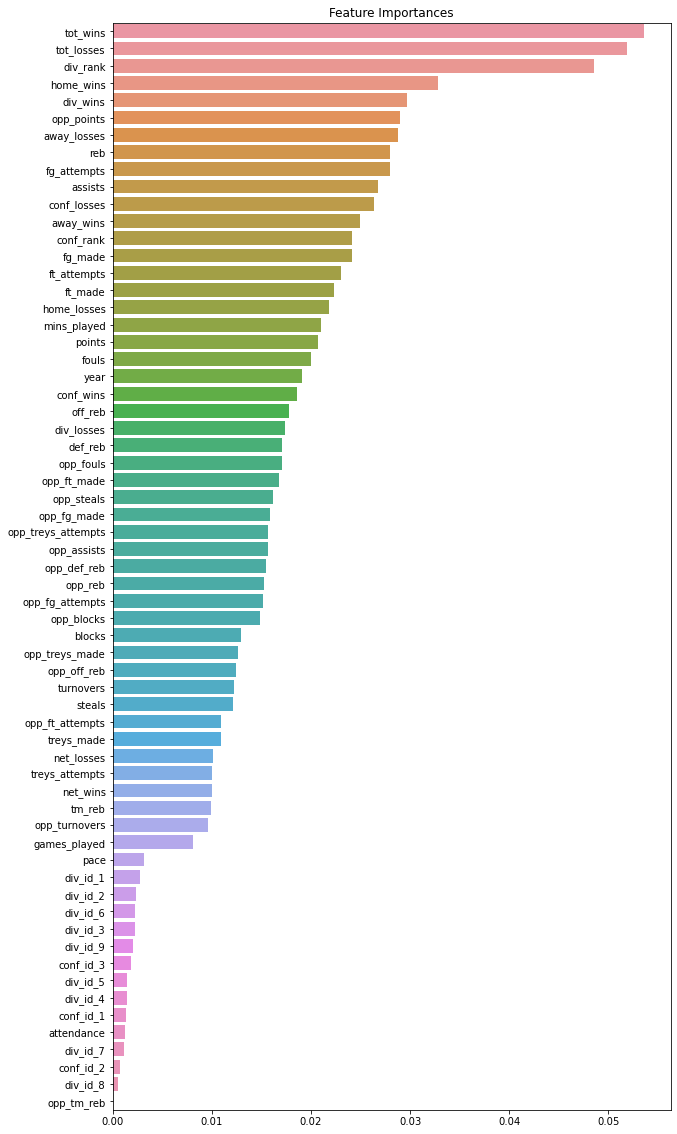

In [75]:
imps = sorted(zip(rf.feature_importances_,X_train_imp_enc.columns),reverse=True)
x_axis = [imp[0] for imp in imps]
y_axis = [imp[1] for imp in imps]
plt.figure(figsize=(10,20))
sns.barplot(x_axis,y_axis)
plt.title('Feature Importances');